In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta, date
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [3]:
# read csv file from task1
df = pd.read_csv('customer_demographic.csv')

## Cleaning

In [4]:
df.shape

(5000, 19)

In [5]:
# check dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          5000 non-null   int64  
 1   first_name                           5000 non-null   object 
 2   last_name                            4846 non-null   object 
 3   gender                               5000 non-null   object 
 4   past_3_years_bike_related_purchases  5000 non-null   int64  
 5   DOB                                  4896 non-null   object 
 6   job_title                            4388 non-null   object 
 7   job_industry_category                4179 non-null   object 
 8   wealth_segment                       5000 non-null   object 
 9   deceased_indicator                   5000 non-null   object 
 10  owns_car                             5000 non-null   object 
 11  tenure                        

In [6]:
df['DOB'] = df['DOB'].astype('datetime64')
df['DOB'] = pd.to_datetime(df["DOB"], errors='coerce')
df['postcode'] = df['postcode'].astype(str).apply(lambda x: x.replace('.0',''))

In [7]:
df['customer_id'] = df['customer_id'].astype(str)

In [8]:
df['DOB']

0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
4995   1959-10-07
4996   2001-10-17
4997   1954-10-05
4998   1952-12-17
4999   1955-10-02
Name: DOB, Length: 5000, dtype: datetime64[ns]

In [9]:
df.rename(columns={"past_3_years_bike_related_purchases":"3y_bike_purchases"}, inplace = True)

In [10]:
df = df.drop(['Rank', 'Value'], axis=1)

In [11]:
df = df.set_index(['customer_id'])

In [12]:
df['state'].value_counts()

NSW                2558
VIC                1205
QLD                1065
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [13]:
# clean the data
df['state'] = df['state'] .replace('New South Wales','NSW').replace('Victoria','VIC')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   first_name             5000 non-null   object        
 1   last_name              4846 non-null   object        
 2   gender                 5000 non-null   object        
 3   3y_bike_purchases      5000 non-null   int64         
 4   DOB                    4896 non-null   datetime64[ns]
 5   job_title              4388 non-null   object        
 6   job_industry_category  4179 non-null   object        
 7   wealth_segment         5000 non-null   object        
 8   deceased_indicator     5000 non-null   object        
 9   owns_car               5000 non-null   object        
 10  tenure                 4913 non-null   float64       
 11  address                4996 non-null   object        
 12  postcode               5000 non-null   object        
 13  state   

In [15]:
df.duplicated().any()

False

In [16]:
# df = df.dropna()

In [17]:
df

,first_name,last_name,gender,3y_bike_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,nan,NaN,NaN,NaN
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9.0,2 Sloan Way,2200,NSW,Australia,7.0
4997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6.0,04 Union Crossing,2196,NSW,Australia,10.0
4998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15.0,33475 Fair Oaks Junction,4702,QLD,Australia,2.0


In [18]:
df_missing = df.isnull().sum()
df_missing

first_name                 0
last_name                154
gender                     0
3y_bike_purchases          0
DOB                      104
job_title                612
job_industry_category    821
wealth_segment             0
deceased_indicator         0
owns_car                   0
tenure                    87
address                    4
postcode                   0
state                      4
country                    4
property_valuation         4
dtype: int64

In [19]:
df.to_csv('task2.csv',header=True)

## EDA

In [20]:
## gender/age/job_industry_category/wealth_segment/3y_bike_purchases/car

## Categorical Variables

In [21]:
categorical = ['gender','job_industry_category','wealth_segment','owns_car']

<AxesSubplot:xlabel='gender', ylabel='count'>

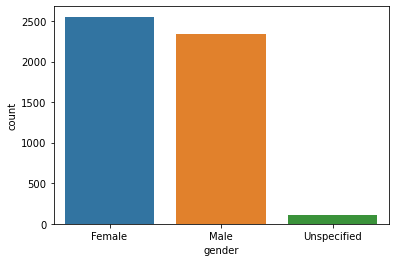

In [22]:
sns.countplot(x='gender',data=df)

In [23]:
df['gender'].value_counts()

Female         2552
Male           2343
Unspecified     105
Name: gender, dtype: int64

[Text(0, 0, 'Health'),
 Text(1, 0, 'Financial Services'),
 Text(2, 0, 'Property'),
 Text(3, 0, 'IT'),
 Text(4, 0, 'Retail'),
 Text(5, 0, 'Argiculture'),
 Text(6, 0, 'Manufacturing'),
 Text(7, 0, 'Telecommunications'),
 Text(8, 0, 'Entertainment')]

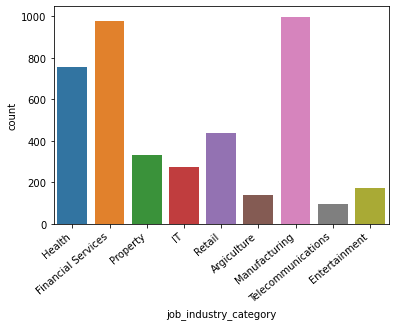

In [24]:
ax = sns.countplot(x='job_industry_category',data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

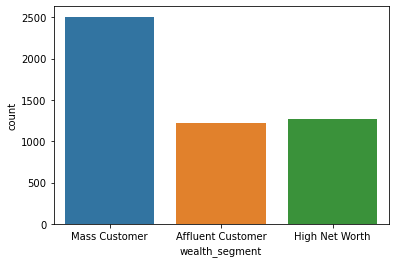

In [25]:
sns.countplot(x='wealth_segment',data=df)

<AxesSubplot:xlabel='owns_car', ylabel='count'>

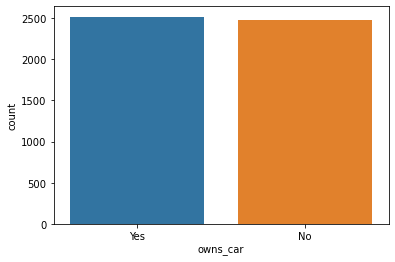

In [26]:
sns.countplot(x='owns_car',data=df)

## Numerical Variables

<AxesSubplot:xlabel='3y_bike_purchases'>

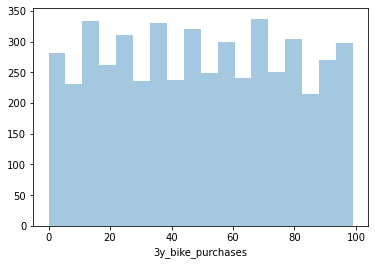

In [27]:
sns.distplot(df['3y_bike_purchases'],kde=False)

<AxesSubplot:xlabel='property_valuation', ylabel='Density'>

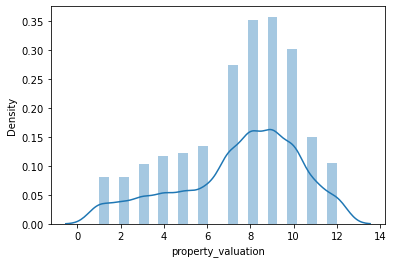

In [28]:
sns.distplot(df['property_valuation'])

<AxesSubplot:xlabel='property_valuation'>

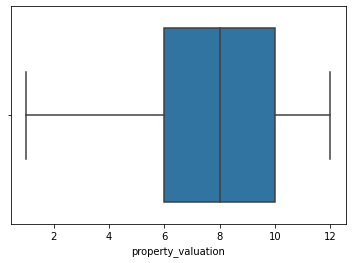

In [29]:
sns.boxplot(df['property_valuation'])

In [30]:

#Analyze on the age vs bikes bought
#Needs to transform
now = pd.to_datetime('now')
age = (now - df['DOB']).astype('<m8[Y]')


In [31]:
df['Age'] = age
# df['Age'] = df['age'].astype(str).apply(lambda x: x.replace('.0',''))
df

,first_name,last_name,gender,3y_bike_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age
customer_id,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10.0,69.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10.0,41.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,nan,NaN,NaN,NaN,68.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9.0,61.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9.0,2 Sloan Way,2200,NSW,Australia,7.0,63.0
4997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6.0,04 Union Crossing,2196,NSW,Australia,10.0,21.0
4998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15.0,33475 Fair Oaks Junction,4702,QLD,Australia,2.0,68.0


<AxesSubplot:xlabel='Age'>

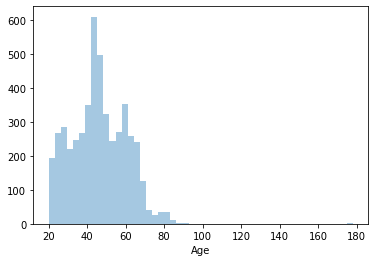

In [32]:
sns.distplot(df['Age'],kde=False)

In [33]:

# Calculate the mean of the values in the 'my_column' column
mean_value = df['Age'].mean()

# Replace values in the column that are greater than 100 with the mean value
df.loc[df['Age'] > 100, 'Age'] = mean_value


In [34]:
# sns.distplot(df['Age'],kde=False)

<AxesSubplot:xlabel='Age', ylabel='Density'>

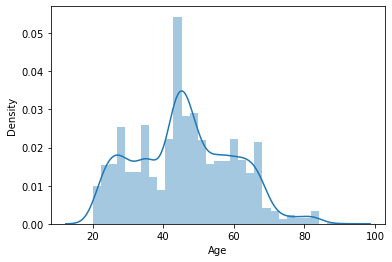

In [35]:
sns.distplot(df['Age'])

In [36]:
df.isnull().sum()

first_name                 0
last_name                154
gender                     0
3y_bike_purchases          0
DOB                      104
job_title                612
job_industry_category    821
wealth_segment             0
deceased_indicator         0
owns_car                   0
tenure                    87
address                    4
postcode                   0
state                      4
country                    4
property_valuation         4
Age                      104
dtype: int64

In [37]:
x = round(df['Age'].mean())
df['Age'].fillna(x,inplace=True)
df['Age']

customer_id
1       69.0
2       41.0
3       68.0
4       61.0
5       45.0
        ... 
4996    63.0
4997    21.0
4998    68.0
4999    69.0
5000    67.0
Name: Age, Length: 5000, dtype: float64

## Numerical Variables & 3y_bike_purchases	

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   first_name             5000 non-null   object        
 1   last_name              4846 non-null   object        
 2   gender                 5000 non-null   object        
 3   3y_bike_purchases      5000 non-null   int64         
 4   DOB                    4896 non-null   datetime64[ns]
 5   job_title              4388 non-null   object        
 6   job_industry_category  4179 non-null   object        
 7   wealth_segment         5000 non-null   object        
 8   deceased_indicator     5000 non-null   object        
 9   owns_car               5000 non-null   object        
 10  tenure                 4913 non-null   float64       
 11  address                4996 non-null   object        
 12  postcode               5000 non-null   object        
 13  state   

<AxesSubplot:xlabel='Age', ylabel='3y_bike_purchases'>

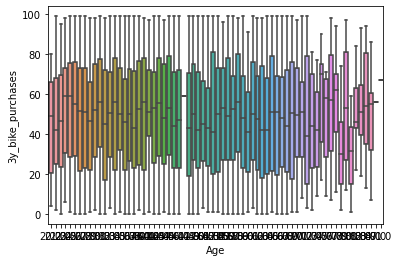

In [39]:
sns.boxplot(x='Age',y='3y_bike_purchases',data=df)


In [40]:
df = df.astype({ "Age": 'str'})
df['decade'] = df.Age.str[:1]
df.head()

,first_name,last_name,gender,3y_bike_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age,decade
customer_id,,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10.0,69.0,6
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10.0,41.0,4
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,nan,NaN,NaN,NaN,68.0,6
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9.0,61.0,6
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4.0,45.0,4


In [41]:
df = df.astype({ "decade": 'int64'})

[Text(0.5, 0, 'Age by Decade'), Text(0, 0.5, '3y bike purchases')]

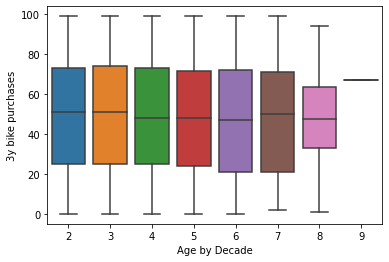

In [42]:
agebox = sns.boxplot(x='decade',y='3y_bike_purchases',data=df)
# add label to the axis and label to the plot
agebox.set(xlabel ="Age by Decade", ylabel = "3y bike purchases")

[Text(0.5, 0, 'Age by Decade'), Text(0, 0.5, '3y bike purchases')]

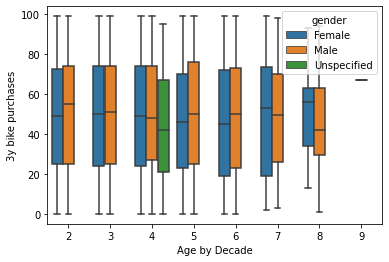

In [43]:
agebox = sns.boxplot(x='decade',y='3y_bike_purchases',data=df,hue='gender')
# add label to the axis and label to the plot
agebox.set(xlabel ="Age by Decade", ylabel = "3y bike purchases")

[Text(0.5, 0, 'Age by Decade'), Text(0, 0.5, '3y bike purchases')]

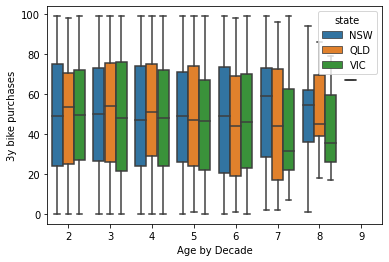

In [44]:
agebox = sns.boxplot(x='decade',y='3y_bike_purchases',data=df,hue='state')
# add label to the axis and label to the plot
agebox.set(xlabel ="Age by Decade", ylabel = "3y bike purchases")

[Text(0.5, 0, 'Age by Decade'), Text(0, 0.5, '3y bike purchases')]

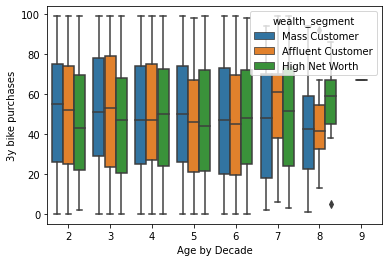

In [45]:
agebox = sns.boxplot(x='decade',y='3y_bike_purchases',data=df,hue='wealth_segment')
# add label to the axis and label to the plot
agebox.set(xlabel ="Age by Decade", ylabel = "3y bike purchases")

[Text(0.5, 0, 'Age by Decade'), Text(0, 0.5, '3y bike purchases')]

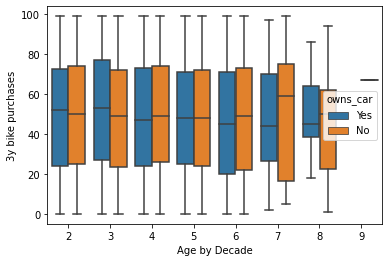

In [46]:
agebox = sns.boxplot(x='decade',y='3y_bike_purchases',data=df,hue='owns_car')
# add label to the axis and label to the plot
agebox.set(xlabel ="Age by Decade", ylabel = "3y bike purchases")

<AxesSubplot:xlabel='property_valuation', ylabel='3y_bike_purchases'>

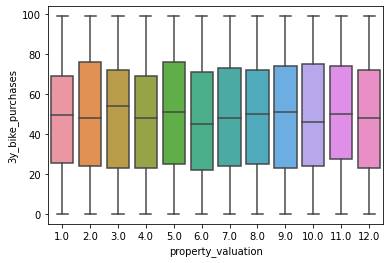

In [47]:
sns.boxplot(x='property_valuation',y='3y_bike_purchases',data=df)

<AxesSubplot:xlabel='decade', ylabel='3y_bike_purchases'>

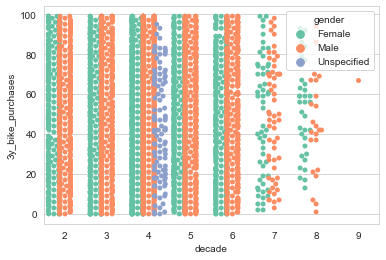

In [48]:
#SWARM HUE
target = 'decade' #target variable
x = '3y_bike_purchases'  #numerical variable

sns.set_style('whitegrid')
sns.swarmplot(x=target,y=x,data=df,hue='gender',palette = "Set2",split=True)

<AxesSubplot:xlabel='property_valuation', ylabel='3y_bike_purchases'>

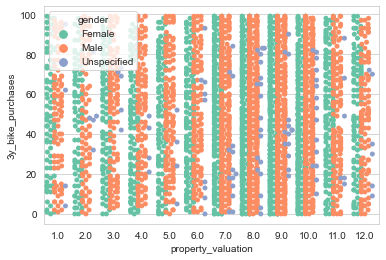

In [49]:
#SWARM HUE
target = 'property_valuation' #target variable
x = '3y_bike_purchases'  #numerical variable

sns.set_style('whitegrid')
sns.swarmplot(x=target,y=x,data=df,hue='gender',palette = "Set2",split=True)

<AxesSubplot:xlabel='property_valuation', ylabel='3y_bike_purchases'>

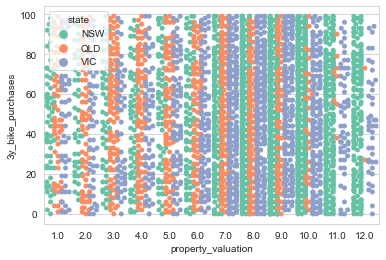

In [50]:
#SWARM HUE
target = 'property_valuation' #target variable
x = '3y_bike_purchases'  #numerical variable

sns.set_style('whitegrid')
sns.swarmplot(x=target,y=x,data=df,hue='state',palette = "Set2",split=True)

In [55]:
#BOX AND SWARM
#target = 'decade' #target variable
#x = '3y_bike_purchases'  #numerical variable

#sns.set_style('whitegrid')
#sns.boxplot(x=target,y=x,data=df,palette = "Set2",whis=np.inf)
#sns.swarmplot(x=target,y=x,data=df,color='black',alpha=0.5)

##  correlation among the variables

In [52]:
feature_var = df[['3y_bike_purchases','decade','property_valuation']]


In [53]:
feature_var.corr().style.background_gradient(cmap='coolwarm')

,3y_bike_purchases,decade,property_valuation
3y_bike_purchases,1.000000,-0.021341,0.005124
decade,-0.021341,1.000000,-0.000575
property_valuation,0.005124,-0.000575,1.000000


In [57]:
df.to_csv('data_clean.csv', encoding='utf-8', index=True)